In [13]:
## Boiler plate code common to many notebooks.  See the TestFilesCommonCode.ipynb for details
from __future__ import print_function
%run TestFilesCommonCode.ipynb

SimpleITK Version: 0.9.1
Compiled: Sep 28 2015 10:07:41



In [14]:
import os
import glob
import sys
import SimpleITK as sitk
import nipype

In [22]:
FA_fn='/raid0/homes/aghayoor/Desktop/invicro_eyeTrackingMR/plotTest_ANONA6EFVB176/FA.nrrd'
lMLF_mask_fn='/raid0/homes/aghayoor/Desktop/invicro_eyeTrackingMR/plotTest_ANONA6EFVB176/lMLF_mask.nii.gz'
rMLF_mask_fn='/raid0/homes/aghayoor/Desktop/invicro_eyeTrackingMR/plotTest_ANONA6EFVB176/rMLF_mask.nii.gz'

In [23]:
FA = sitk.ReadImage(FA_fn)
lMLF_mask = sitk.ReadImage(lMLF_mask_fn)
rMLF_mask = sitk.ReadImage(rMLF_mask_fn)

#myshow(FA)
#myshow(sitk.LabelToRGB(lMLF_mask))
#myshow(sitk.LabelToRGB(rMLF_mask))

In [24]:
def ResampleMask(in_mask, ref_mask):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(ref_mask)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    res_mask = resampler.Execute(in_mask)
    return res_mask

In [25]:
#lMLF_mask = ResampleMask(lMLF_mask,FA)
#rMLF_mask = ResampleMask(rMLF_mask,FA)

#stat = sitk.StatisticsImageFilter()
#stat.Execute(lMLF_mask)
#print(stat.GetMaximum())
#print(stat.GetMinimum())

In [28]:
lMLF_values = np.zeros(FA.GetDepth())
rMLF_values = np.zeros(FA.GetDepth())
for z in xrange(FA.GetDepth()):
    FA2D = FA[:,:,z]
    lMLF_mask_2D = lMLF_mask[:,:,z]
    rMLF_mask_2D = rMLF_mask[:,:,z]
    #
    lMLF_mask_2D = ResampleMask(lMLF_mask_2D,FA2D)
    rMLF_mask_2D = ResampleMask(rMLF_mask_2D,FA2D)
    #
    stat_l = sitk.LabelStatisticsImageFilter()
    stat_l.Execute(FA2D,lMLF_mask_2D)
    lvalue = stat_l.GetMean(1)
    lMLF_values[z]=lvalue
    #
    stat_r = sitk.LabelStatisticsImageFilter()
    stat_r.Execute(FA2D,rMLF_mask_2D)
    rvalue = stat_r.GetMean(1)
    rMLF_values[z]=rvalue

In [41]:
# print(lMLF_values)
# print(rMLF_values)

In [37]:
lMLF_values = np.trim_zeros(lMLF_values)
rMLF_values = np.trim_zeros(rMLF_values)

In [38]:
import pandas as pd
from ggplot import *

/IPLlinux/raid0/homes/aghayoor/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


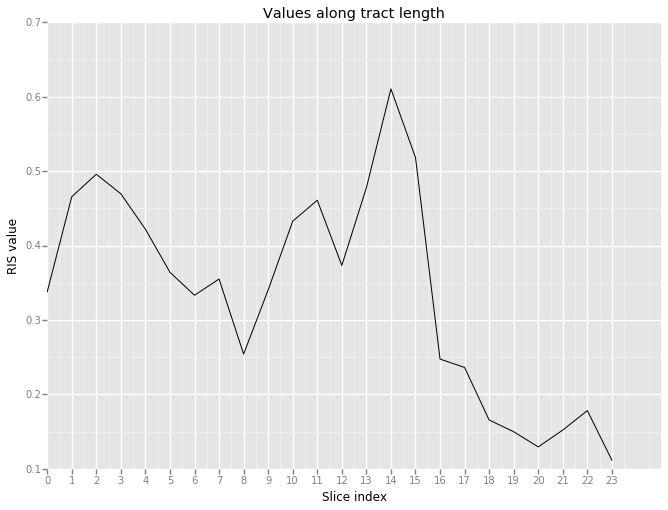

<ggplot: (321592853)>


In [39]:
lMLF_plot_array = np.transpose([np.arange(len(lMLF_values)), list(reversed(lMLF_values))])

DF_xy = pd.DataFrame(lMLF_plot_array)
DF_xy.rename(columns = lambda x: str(x), inplace=True)
DF_xy.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_xy.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
#DF_xy

p1 = ggplot(DF_xy, aes(x = 'X', y ='Y')) + \
     geom_line() + \
     labs(x='Slice index', y='RIS value', title='Values along tract length') + \
     scale_x_continuous(breaks=np.arange(len(lMLF_values)).tolist())
        
print(p1)

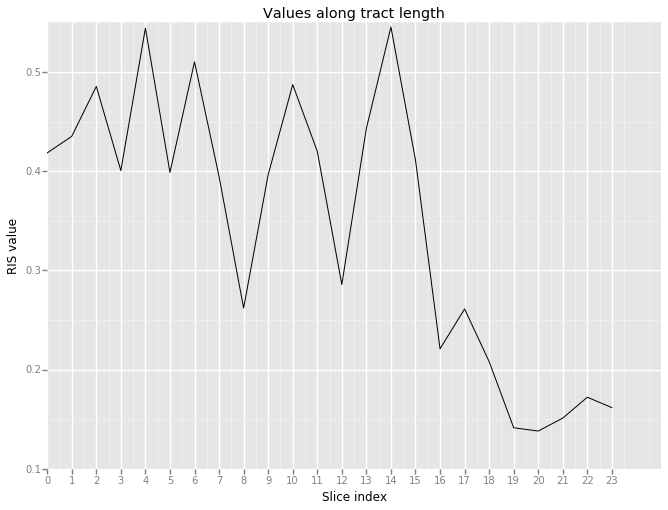

<ggplot: (321589901)>


In [40]:
rMLF_plot_array = np.transpose([np.arange(len(rMLF_values)), list(reversed(rMLF_values))])

DF_xy = pd.DataFrame(rMLF_plot_array)
DF_xy.rename(columns = lambda x: str(x), inplace=True)
DF_xy.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_xy.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
#DF_xy

p2 = ggplot(DF_xy, aes(x = 'X', y ='Y')) + \
    geom_line() + \
    labs(x='Slice index', y='RIS value', title='Values along tract length') + \
    scale_x_continuous(breaks=np.arange(len(lMLF_values)).tolist())
        
print(p2)

In [66]:
ris_name=os.path.splitext(os.path.basename(FA_fn))[0]
print(ris_name)

FA


In [67]:
tract_file_name=os.path.splitext(os.path.basename(lMLF_mask_fn))[0]
tract_name=tract_file_name.split('_',2)[0]
if tract_name == "lMLF":
    tract_name="Left MLF"
elif tract_name == "rMLF":
    tract_name="Right MLF"
print(tract_name)

Left MLF


In [68]:
y_axis_label=ris_name+" Value"
print(y_axis_label)
title_label="Values Along " + tract_name
print(title_label)

FA Value
Values Along Left MLF


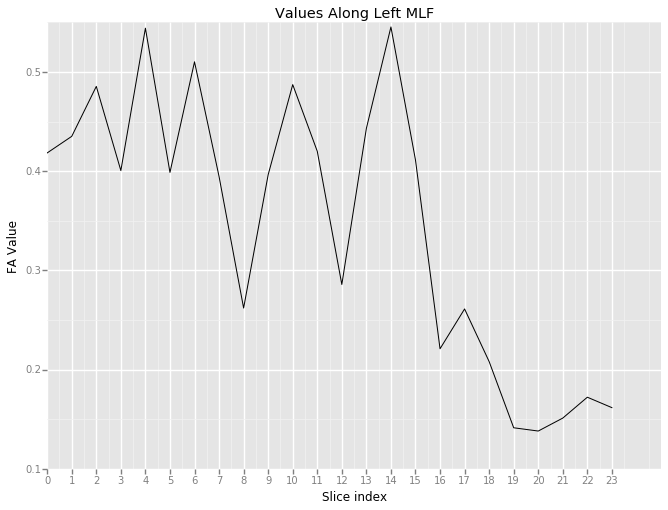

<ggplot: (322419173)>


In [69]:
p3 = ggplot(DF_xy, aes(x = 'X', y ='Y')) + \
    geom_line() + \
    labs(x='Slice index', y=y_axis_label, title=title_label) + \
    scale_x_continuous(breaks=np.arange(len(lMLF_values)).tolist())
        
print(p3)

In [71]:
ggsave(plot = p3, filename = '/raid0/homes/aghayoor/Desktop/testplot.png')

Saving 11.0 x 8.0 in image.
